# <center><font color = 'Lightcyan'> Proyecto de módulo: Titanic <center>

## <font color = 'Lightcyan'> Extracción de datos

____________________________________________________________________________________________________________________________________________________________________________________________________________

In [1]:
#Importamos las librerias vistas durante el modulo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#con la función read_csv de pandas, podremos leer el csv

df = pd.read_csv('titanic.csv')
df

#10.692 datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<font color = 'Cadetblue'> Definicion de las columnas:

- PassengerId: id de cada pasajero. Identificador unico.
- Survived: indica si el pasajero ha sobrevivido o no (0=No; 1=Si)
- Pclass: clase de cada pasajero
- Name: nombre de cada pasajero
- Sex: género 
- Age: edad del pasajero
- SibSp: indica el número de hermanos o cónyuges que el pasajero tenía a bordo
- Parch: indica el número de hijos o padres que tenia el pasajero a bordo
- Ticket: ticket de cada pasajero
- Fare: importe del ticket
- Cabin: cabina de cada pasajero que ha comprado el ticket con camarote incluido
- Embarked: puertos de embarque

## <font color = 'Lightcyan'> Transformacion y limpieza de los datos

____________________________________________________________________________________________________________________________________________________________________________________________________________

<font color = 'Cadetblue'> El tratamiento y limpieza de datos se hará sobre tres aspectos:
- Valores nulos
- Valores duplicados
- Tipos de datos

In [3]:
""""
Veamos ahora cuantos valores nulos hay:
Existen 3 variables con valores nulos ('Age', 'Cabin', 'Embarked')

"""

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
"""

En el caso de 'Cabin', sustituiremos los valores nulos por 'Sin cabina', ya que asummimos que los que se presentan como 'NaN' es debido a que el billete no incluia camarote

"""

#CABIN: sustituiremos los valores nulos por 'Sin cabina'

df['Cabin'].fillna('Sin cabina', inplace=True)


#EMBARKED: sustituiremos los valores nulos por 'No embarcado'

"""

En el caso de 'Embarked', sustituiremos los valores nulos por 'No embarcado', ya que asummimos que los que se presentan como 'NaN' es debido a que los pasajeros en cuestión no embarcaron.

"""

df['Embarked'].fillna('No embarcado', inplace=True)

"""
En el caso de 'Age', para que cada fila de la que no disponemos de la edad no quede alterada informando de una edad 'falsa', vamos a sutituir los valores por 0.
Este cambio lo tendremos que tener en cuenta a la hora de sacar la media de edad, ya que tendremos que excluir estos valores.

"""

#AGE: sustituiremos los valores nulos por 0

df['Age'].fillna(0, inplace=True)

In [5]:
#nos aseguramos de que se haya hecho correctamente:

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
"""
Vamos a ver de qué tipo es cada variable:
bservamos que 'Age' es float, cuando deberia ser 'int'.

"""

df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#Convertimos la variable 'Age' a tipo 'int':

df['Age'] = df['Age'].astype(int)

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
"""
Vamos a ver si existen duplicados:
Observamos que no existen duplicados.

"""

df.duplicated().any()

False

<font color = 'Cadetblue'> Además, e ha observado que la variable 'Fare' es una variable de tipo float con 4 decimales. Para hacerla más simple y 'atractiva', la redondearemos a 2 decimales.

In [9]:
#Redondeamos 'Fare' a 2 decimales. Esta funcion no admite el 'inplace=True' para guardar el cambio, así que lo guardamos dentro de la columna.
df['Fare'] = round(df['Fare'], 2)

<font color = 'Cadetblue'> Visualizamos de nuevo nuestro df para ver cómo ha quedado tras todos los cambios:

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Sin cabina,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,Sin cabina,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,Sin cabina,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,Sin cabina,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.45,Sin cabina,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C


## <font color = 'Lightcyan'> Visualización y analisis de los datos

____________________________________________________________________________________________________________________________________________________________________________________________________________

<font color = 'Cadetblue'> Tres de los análisis que se han realizado, se harán sobre la muestra de pasajeros afectados, es decir, los que embarcaron. Para que estos análisis se hagan de manera más eficiente, vamos a crear un fichero en el que se excluyan a las personas que no embarcaron de la muestra.

In [11]:
#Filtramos el DF para obtener a esas personas que no han embarcado, guardando la información en un nuevo df llamado 'no_embarcado'.

no_embarcado = df[df['Embarked'] == 'No embarcado']

#Visualizamos las personas que no han embarcado

no_embarcado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,No embarcado
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,No embarcado


In [12]:
#Creamos un nuevo df (para no alterar el original) para extraer a estos dos pasajeros de la muestra. 

df1 = df.copy()
df1 = df1.drop([61, 829], axis = 0) #eliminamos las filas correspondientes a los pasajeros

In [13]:
#Si se ha hecho bien, ahora nuestro nuevo df pasará de 891 filas a 889.
#Lo comprobamos con shape:

df1.shape

(889, 12)

###  <font color = 'Lightcyan'> Análisis sobre la edad

<font color = 'Lightcyan'> ¿Cual es la media de edad de todos los pasajeros?

<font color = 'Cadetblue'> Antes del cálculo, primero vamos a ver cómo está distribuida la variable 'Age'. En concreto, queremos ver si hay muchos outliers que puedan afectar a la media.

In [14]:
#Diagrama de caja:
fig1 = px.box(df1, y='Age', template='ggplot2')
fig1.show()

<font color = 'Cadetblue'> Observamos que no existen muchos valores atípicos, por lo que el cálculo de la media de edad no se verá afectada por estos valores.

<font color = 'Cadetblue'> Una vez hemos visto que es posible utilizar la media, procedemos a su calculo. Se ha decidido calcular la media con dos muestras:
- Excluyendo de la muestra todos aquellos pasajeros que no informaron de su edad.
- Incluyendo la media o mediana de la edad en aquellos pasajeros que no informaron de su edad.

Para este análisis, tendremos en cuenta nuestro df1, ya que es el que contempla los pasajeros afectados, excluyendo los que no han embarcado.

In [15]:
"""
CALCULO DE LA MEDIA EXCLUYENDO A AQUELLOS PASAJEROS DE LOS CUALES NO SE DISPONE INFORMACIÓN SOBRE SU EDAD

"""

#Debido a que el análisis se quiere realizar sobre los afectados, utilizamos el df1 ya que es el que excluye a los pasajeros que no embarcaron.
#Primero vamos a filtrar los valores que no son 0:

edad_filtrada = df1[df1['Age'] != 0]

#calculamos la media sobre esta nueva muestra:

media_edad = edad_filtrada['Age'].mean()

#la convertimos a tipo 'int'
media_edad = media_edad.astype(int)

print('La media de edad de los pasajeros que embarcaron y considerando solo los pasajeros cuya edad está informada fue de', media_edad, 'años')

La media de edad de los pasajeros que embarcaron y considerando solo los pasajeros cuya edad está informada fue de 29 años


In [16]:
"""
CALCULO DE LA MEDIA INCLUYENDO LA MEDIA PARA AQUELLOS PASAJEROS DE LOS CUALES NO SE DISPONE INFORMACIÓN SOBRE SU EDAD

"""

#vamos a hacer lo mismo, pero tomando la media en aquellos casos en los que no disponemos de la edad:

if (df1['Age'] == 0).any(): #si la edad = 0
    df1['Age'].replace(0, df1['Age'].mean(), inplace = True) #sustituyelo por la media de edad


In [17]:
#calculamos ahora la media:

media_edad_2 = df1['Age'].mean()
media_edad_2

#la convertimos a tipo 'int'
media_edad_2 = media_edad_2.astype(int)

print('La media de edad de los pasajeros que embarcaron y considerando la media para aquellos que no viene informada fue de', media_edad_2, 'años')



La media de edad de los pasajeros que embarcaron y considerando la media para aquellos que no viene informada fue de 28 años


<font color = 'Lightcyan'> ¿Cómo se distribuyen las edades entre los pasajeros que han sobrevivido y los que han fallecido?

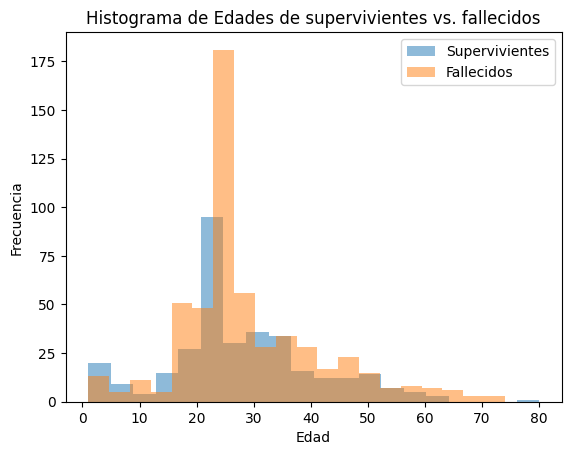

In [18]:
# Primero filtramos los pasajeros que han sobrevivido y los que han fallecido y accedemos a sus edades, guardando todo en las variables 'age_survived' y 'age_not_survived'
edad_superv = df1[df1['Survived'] == 1]['Age']
edad_fallec = df1[df1['Survived'] == 0]['Age']

# Crear el histograma
plt.hist(edad_superv, bins=20, alpha=0.5, label='Supervivientes') #una de las barras del histograma representará, las edades de los que han sobrevivido
plt.hist(edad_fallec, bins=20, alpha=0.5, label='Fallecidos') #la otra barra representará las edades de los que han sobrevivido

# Ponemos el nombre a los ejes y el titulo
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de supervivientes vs. fallecidos')
plt.legend()

# Mostrar el histograma
plt.show()

<font color = 'Cadetblue'> Se observa que la mayor parte de las edades se concentra en el ragno 15-35 años, tanto para los supervivientes como para los fallecidos.

### <font color = 'Lightcyan'> Analisis de precios

<font color = 'Cadetblue'> Para llevar a cabo este análisis, utilizaremos nuestro DF orginal (el que contiene toda la muestra) ya que los precios de los pasajeros que no embarcaron tambien tiene logica tenerlos en cuenta.

<font color = 'Lightcyan'> ¿Cual es el precio medio o mediana de cada clase?

 <font color = 'Cadetblue'> Al igual que en la variable 'Edad', como primer paso vamos a ver cómo se distribuye la variable 'Fare', para poder tomar la decision sobre si utilizar la media o la mediana.

In [19]:
fig = px.box(df, y='Fare', template='ggplot2')
fig.show()

<font color = 'Cadetblue'> Se observa que la variable 'Fare' sí que presenta outliers que pueden alterar significativamente la media. Por este motivo, calcularemos la mediana.

In [20]:
#CLASE 1:
#filtramos nuestro DF:
Pclass_1 = df[df['Pclass'] == 1]

#Accedemos a los precios de nuestro DF ya filtrado:
Pclass1_precios = Pclass_1['Fare']

#Hacemos la media
Pclass1_mediana = Pclass1_precios.median()

#CLASE 2:
#ahora lo haremos en un solo paso:
Pclass_2 = df[df['Pclass'] == 2]['Fare'].median()


#CLASE 3:

Pclass_3 = df[df['Pclass'] == 3]['Fare'].median()




print('El precio medio de la clase 1 es:', Pclass1_mediana)
print('El precio medio de la clase 2 es:', Pclass_2)
print('El precio medio de la clase 3 es:', Pclass_3)

El precio medio de la clase 1 es: 60.29
El precio medio de la clase 2 es: 14.25
El precio medio de la clase 3 es: 8.05


<font color = 'Lightcyan'> ¿Cual es el precio medio por clase, diferenciando entre si el billete incluye camarote o no?

<font color = 'Cadetblue'> Para llevar a cabo este ejercicio, tenemos que agrupar los diferentes camarotes asignados en una sola variable, para que después podamos agrupar entre los que sí que disponen de camarote y los que no. Para no alterar el df original, este cambio lo haremos en un nuevo df que llamaremos df2.

In [21]:
#primero vamos a crear una copia del df original para no alterarlo:
df2 = df.copy()


# Filtramos los valores que son diferentes a 'Sin cabina' y le asignamos el valor 'Con cabina'. 
# Tenemos que indicarle que la condicion se aplicará a la columna 'Cabin', ya que sino se aplicará a toda la fila.

df2.loc[df2['Cabin'] != 'Sin cabina', 'Cabin'] = 'Con cabina'

#creamos un nuevo dataframe para operar sobre este.

df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Sin cabina,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,Con cabina,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,Sin cabina,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,Con cabina,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,Sin cabina,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,Sin cabina,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,Con cabina,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.45,Sin cabina,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,Con cabina,C


In [22]:
# Agrupamos y calculamos la mediana

precios_medios = df2.groupby(['Pclass', 'Cabin'])['Fare'].median() #al haber creado la variable 'Con cabina', ya podemos agrupar.

# Dado que existen precios muy altos y muy bajos que pueden alterar los resultados, hemos decidido realizarlo con la mediana.

precios_medios

Pclass  Cabin     
1       Con cabina    67.950
        Sin cabina    44.750
2       Con cabina    13.000
        Sin cabina    15.025
3       Con cabina    10.460
        Sin cabina     8.050
Name: Fare, dtype: float64

<font color = 'Lightcyan'> ¿Por qué la media general del precio de la clase 3 coincide con la media del precio de la clase 3 que no incluye cabina?

In [23]:
"""
Para responder a la pregunta, se va a observar la demanda de cada tipo de billete (con cabina y sin cabina).
Si existe mucha más demanda de billetes sin cabina que incluyendola, seguramente el hecho de que coincida la media se deba a esto.

"""

#Numero de personas que escogieron clase 3 con cabina:

clase3_concabina = df2[(df2['Pclass'] == 3) & (df2['Cabin'] == 'Con cabina')]

num_personas_1 = clase3_concabina.value_counts().sum()

#Numero de personas que escogieron clase 3 sin cabina:

clase3_sincabina = df2[(df2['Pclass'] == 3) & (df2['Cabin'] == 'Sin cabina')]

num_personas_2 = clase3_sincabina.value_counts().sum()

print('Personas que escogieron la clase 3 con cabina:', num_personas_1)
print('Personas que escogieron la clase 3 sin cabina:', num_personas_2)



Personas que escogieron la clase 3 con cabina: 12
Personas que escogieron la clase 3 sin cabina: 479


<font color = 'Cadetblue'> Se observa una gran diferencia en cuanto a la demanda de billetes que incluyen cabina y los que no. Seguramente, la media general del precio de la clase 3 coincida con la media del precio de la clase 3 sin cabina porque se ve muy influenciada por los precios de este tipo de billete.

<font color = 'Lightcyan'> ¿Por qué el precio de la clase 2 con cabina es más bajo que la clase 2 sin cabina?

In [24]:
"""
Para responder a la pregunta, vamos a ver la presencia de outliers en cada tipo de billete.
Para ello, crearemos dos DataFrames filtrados según si incluye cabina o no, y veremos los outliers en el precio.

"""
#filtramos el df2 para quedarnos solo con las filas que incluyan la clase 2 con cabina, y accedemos al precio.
df_clase2_concabina = df2[(df2['Pclass']==2) & (df2['Cabin'] == 'Con cabina')]['Fare']
df_clase2_concabina = pd.DataFrame(df_clase2_concabina)
df_clase2_concabina

#gráfico:
fig1 = px.box(df_clase2_concabina, y='Fare', template='ggplot2', title='Distribución de los precios del billete de clase 2 con cabina')

fig1.show()


In [25]:
# Filtramos el df2 para quedarnos solo con las filas que incluyan la clase 2 sin cabina, y accedemos al precio.

df_clase2_sincabina = df2[(df2['Pclass']==2) & (df2['Cabin'] == 'Sin cabina')]['Fare']
df_clase2_sincabina = pd.DataFrame(df_clase2_sincabina)
df_clase2_sincabina

# Grafico:
fig1 = px.box(df_clase2_sincabina, y='Fare', template='ggplot2', title='Distribución de los precios del billete de clase 2 sin cabina')
fig1.show()

<font color = 'Cadetblue'> Se observa que los precios de la clase 2 que no incluyen camarote se ven afectados por la presencia de dos outliers positivos, mientras que los precios del billete de la clase 2 con camarote se encuentran mejor distribuidos. Aunque hayamos utilizado la mediana y esta sea menos sensible a los outliers, se sigue viendo influenciada por los mismos, sobretodo si son outliers muy lejanos al resto de datos.

<font color = 'Lightcyan'> ¿Existe algún tipo de relacion entre el precio del billete y la edad del pasajero?

<font color = 'Cadetblue'> El objetivo de este ejercicio es ver si las personas más jóvenes tienden a comprar billetes más baratos y las personas más mayores a comprar billetes más caros.
Para ello vamos a ver la correlacion entre las dos variables.

La correlación entre las dos variables es de: 0.13566013676260588


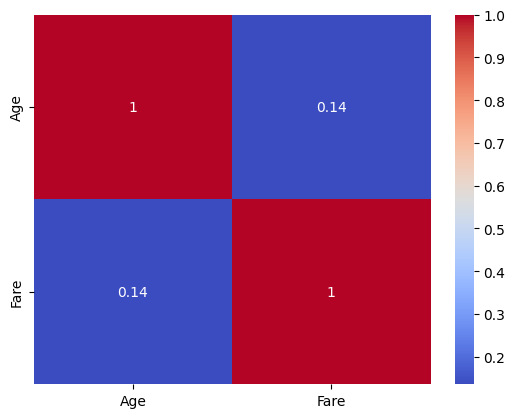

In [26]:
# Creamos un df nuevo (df6) para almacenar las columnas 'Age' y 'Fare': 
df4 = df[['Age', 'Fare']]
df4

#Correlacion:
correlacion = df4['Fare'].corr(df4['Age'])
print('La correlación entre las dos variables es de:', correlacion)

#Heatmap
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm');


<font color = 'Cadetblue'> Se observa que la correlación es baja, aún así positiva. Esto quiere decir que, efectivamente, las personas más mayores tienden a comprar tarifas de billetes ligeramente más caras.

### <font color = 'Lightcyan'> Análisis de los pasajeros supervivientes y fallecidos

<font color = 'Lightcyan'> ¿Cuantas personas sobrevivieron y cuantas fallecieron?

<font color = 'Cadetblue'> Para este ejercicio, volveremos a nuestro df1, que es el que contempla los pasajeros afectados (los que embarcaron).

In [27]:
#filtramos la variable

vivos = df1[df1['Survived'] == 1] 
fallecidos = df1[df1['Survived'] == 0]

#contamos cuantas hay con valor 1 y 0
vivos = vivos['Survived'].value_counts()

fallecidos = fallecidos['Survived'].value_counts()

#imprimimos
#sobrevivieron 340 personas.
print(vivos)
print(fallecidos)

Survived
1    340
Name: count, dtype: int64
Survived
0    549
Name: count, dtype: int64


<font color = 'Lightcyan'> ¿Cuantos supervivientes y personas fallecidas tenian a bordo algún familiar?

<font color = 'Cadetblue'> Para llevar a cabo este análisis, tenemos que agregar las columnas 'Parch' y 'SibSp', ya que la suma total de cónyuges, hermanos, hijos y padres nos dará el total de familiares a bordo.

In [28]:
# Sumamos las columnas para obtener el total de familiares:

df1['Total relatives'] = df1['SibSp'] + df1['Parch']

df1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.25,Sin cabina,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.28,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.92,Sin cabina,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.10,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.05,Sin cabina,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,Sin cabina,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.724409,1,2,W./C. 6607,23.45,Sin cabina,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,0


In [29]:
"""
IMPORTANTE: Queremos sacar las personas que tuvieran ALGÚN familiar, no el total de familiares.
"""
#SUPERVIVIENTES:
#filtramos nuestro df1 para obtener las lineas que sean survived = 1 y que el total de familiares sea diferente de 0.
familiares_supervivientes = df1[(df1['Survived'] == 1) & (df1['Total relatives'] != 0)]

familiares_supervivientes = familiares_supervivientes.value_counts().sum()
familiares_supervivientes

#FALLECIDOS:
#filtramos nuestro df1 para obtener las lineas que sean survived = 0 y que el numero total de familiares sea diferente de 0:
familiares_fallecidos = df1[(df1['Survived'] == 0) & (df1['Total relatives'] != 0)]
familiares_fallecidos = familiares_fallecidos.value_counts().sum() #sumamos el total de familiares

#IMPRIMIMOS:
print('De los que sobrevivieron,', familiares_supervivientes, 'contaban con algun familiar a bordo')
print('De los que fallecieron,', familiares_fallecidos, 'contaban con algun familiar a bordo')


De los que sobrevivieron, 179 contaban con algun familiar a bordo
De los que fallecieron, 175 contaban con algun familiar a bordo


<font color = 'Lightcyan'> De esas personas que tenian familiares a bordo, ¿cuantas tenian padres o hijos?

In [30]:
#SUPERVIVIENTES:
#filtramos nuestro df1 para obtener las lineas que sean survived = 1 y que el numero total de hijos o padres sea diferente de 0:
parch_vivos = df1[(df1['Survived']==1) & (df1['Parch'] != 0)]
parch_vivos = parch_vivos.value_counts().sum()


#FALLECIDOS:
#filtramos nuestro df1 para obtener las lineas que sean survived = 0 y que el numero total de hijos o padres sea diferente de 0:
parch_fallecidos = df1[(df1['Survived']==0) & (df1['Parch'] != 0)]
parch_fallecidos = parch_fallecidos.value_counts().sum()

#IMPRIMIMOS:
print('De los que sobrevivieron,', parch_vivos, 'tenian padres o hijos')
print('De que fallecieron,', parch_fallecidos, 'tenian padres o hijos')

De los que sobrevivieron, 109 tenian padres o hijos
De que fallecieron, 104 tenian padres o hijos


<font color = 'Cadetblue'>Tras realizar los anteriores análisis, se ha visto la posibilidad de grear un gráfico Funnel:

In [31]:
!pip install nbformat>=4.2.0


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import plotly.express as px
#nombramos los stages
stages = ['Survived/Not Survived', 'Relatives', 'Parents/Children']
#definimos la variable mujeres, indicandole los valores y el nombre de la variable
df_fallecidos = pd.DataFrame(dict(number = [549, 175, 104], stage = stages))
df_fallecidos['Survived'] = 0
#definimos la variable hombres, indicandole los valores y el nombre de la variable
df_vivos = pd.DataFrame(dict(number = [340, 179, 109], stage = stages))
df_vivos['Survived'] = 1
#concatenamos los dos DF
df3 = pd.concat([df_fallecidos, df_vivos])
fig = px.funnel(df3, x = 'number', y = 'stage', color='Survived', template='ggplot2')
fig.show()

### <font color = 'Lightcyan'> Análisis según el género

<font color = 'Lightcyan'> ¿Cuantos hombres y cuantas mujeres embarcaron?

In [33]:
#Primero filtramos el df1 por el género 'female' y contamos los valores que existen con este filtro.

mujeres = df1[df1['Sex'] == 'female'].value_counts().sum()

#Replicamos lo mismo para los hombres:

hombres = df1[df1['Sex'] == 'male'].value_counts().sum()


print('Total mujeres a bordo:', mujeres)
print('Total hombres a bordo:', hombres)

Total mujeres a bordo: 312
Total hombres a bordo: 577


<font color = 'Lightcyan'> ¿Cuantas mujeres y cuantos hombres fallecieron y sobrevivieron?

In [34]:
# Agrupamos y calculamos la mediana

muj_hom_estado = df1.groupby(['Sex'])['Survived'].value_counts() #al haber creado la variable 'Con cabina', ya podemos agrupar.

# Dado que existen precios muy altos y muy bajos que pueden alterar los resultados, hemos decidido realizarlo con la mediana.

muj_hom_estado

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [35]:
"""
La información anterior no confirma del todo que murieran más hombres que mujeres, ya que a bordo ya había más hombres. 
Para saber esto, habría que ver la proporción.
"""
#MUJERES:
proporcion_fallecidos_muj = lambda mujeres: round((81 / mujeres)*100, 2)

resultado_mujeres = proporcion_fallecidos_muj(mujeres)

#HOMBRES:
proporcion_fallecidos_hom = lambda hombres: round((468 / hombres)*100, 2)

resultado_hombres = proporcion_fallecidos_hom(hombres)


print('La proporción de mujeres que murieron sobre las que embarcaron fue:', resultado_mujeres,'%')
print('La proporción de hombres que murieron sobre las que embarcaron fue:', resultado_hombres,'%')

La proporción de mujeres que murieron sobre las que embarcaron fue: 25.96 %
La proporción de hombres que murieron sobre las que embarcaron fue: 81.11 %


## <font color = 'Lightcyan'> Análisis complementario: evacuación de pasajeros

____________________________________________________________________________________________________________________________________________________________________________________________________________

<font color = 'Cadetblue'> Para realizar el presente análisis complementario, se ha consultado la web https://es.wikipedia.org/wiki/Hundimiento_del_RMS_Titanic donde se informa sobre los botes que se tiraron para el rescate de pasajeros. 

In [36]:
#guardamos nuestra URL en una variable
URL = 'https://es.wikipedia.org/wiki/Hundimiento_del_RMS_Titanic'

#con read_html, se va a leer el codigo entero. Como pandas lo que hace es crear tablas, va a almacenar en la variable 'tables' las tablas que encuentre
tablas = pd.read_html(URL)
tablas

[                          Hundimiento del RMS Titanic  \
 0   Der Untergang der Titanic, ilustración del hun...   
 1                                              Suceso   
 2                                               Fecha   
 3                                                Hora   
 4                                               Causa   
 5                                               Lugar   
 6                                         Coordenadas   
 7                                              Origen   
 8                                       Última escala   
 9                                             Destino   
 10                                         Fallecidos   
 11                                          Implicado   
 12                                               Tipo   
 13                                           Operador   
 14                                           Registro   
 15                                             Nombre   
 16           

In [37]:
#como siguiente paso, se ha creado un bucle for para iterar sobre las tablas que se han encontrado.


for tabla in tablas: #para cada elemento de mi variable 'tables' (la que contiene todas las tablas encontradas)
    if 'Botes' in tabla.columns: #si la palabra 'botes' está en las clumnas del elemento
        print(tabla) #imprimeme la tabla
        break #si encuentra alguna, para la iteracion
          
else:
    print('Tabla no encontrada')

      Botes Hora del lanzamiento al mar[74]​  Capacidad  Contenido real  \
0    Bote 1                            01:05         40              12   
1    Bote 2                            01:45         40              18   
2    Bote 3                            00:55         65              32   
3    Bote 4                            01:50         65              30   
4    Bote 5                            00:43         65              35   
5    Bote 6                            01:10         65              24   
6    Bote 7                            00:40         65              28   
7    Bote 8                            01:00         65              28   
8    Bote 9                            01:30         65              42   
9   Bote 10                            01:50         65              34   
10  Bote 11                            01:35         65              55   
11  Bote 12                            01:30         65              40   
12  Bote 13              

In [38]:
#convertimos a DF
tabla = pd.DataFrame(tabla)
tabla

,Botes,Hora del lanzamiento al mar[74]​,Capacidad,Contenido real,Lado,Personal de asistencia,Hora de recogida por el Carpathia[75]​
0,Bote 1,01:05,40,12,Estribor,"Murdoch, Lowe",04:45
1,Bote 2,01:45,40,18,Babor,"Wilde, Smith",04:10
2,Bote 3,00:55,65,32,Estribor,"Murdoch, Lowe",07:30
3,Bote 4,01:50,65,30,Babor,Lightoller,08:00
4,Bote 5,00:43,65,35,Estribor,"Murdoch, Lowe, Pitman",06:00
5,Bote 6,01:10,65,24,Babor,"Lightoller, Smith",08:00
6,Bote 7,00:40,65,28,Estribor,"Murdoch, Lowe",06:15
7,Bote 8,01:00,65,28,Babor,"Lightoller, Wilde, Smith",07:30
8,Bote 9,01:30,65,42,Estribor,"Murdoch, Moody",06:15
9,Bote 10,01:50,65,34,Babor,Murdoch,08:00


In [39]:
#vamos a quitarnos la fila del total

tabla = tabla.drop(tabla.index[20])

tabla


,Botes,Hora del lanzamiento al mar[74]​,Capacidad,Contenido real,Lado,Personal de asistencia,Hora de recogida por el Carpathia[75]​
0,Bote 1,01:05,40,12,Estribor,"Murdoch, Lowe",04:45
1,Bote 2,01:45,40,18,Babor,"Wilde, Smith",04:10
2,Bote 3,00:55,65,32,Estribor,"Murdoch, Lowe",07:30
3,Bote 4,01:50,65,30,Babor,Lightoller,08:00
4,Bote 5,00:43,65,35,Estribor,"Murdoch, Lowe, Pitman",06:00
5,Bote 6,01:10,65,24,Babor,"Lightoller, Smith",08:00
6,Bote 7,00:40,65,28,Estribor,"Murdoch, Lowe",06:15
7,Bote 8,01:00,65,28,Babor,"Lightoller, Wilde, Smith",07:30
8,Bote 9,01:30,65,42,Estribor,"Murdoch, Moody",06:15
9,Bote 10,01:50,65,34,Babor,Murdoch,08:00


<font color = 'Lightcyan'> ¿Cuantos botes se tiraron en total y cuantas personas consiguieron subirse?

In [40]:
num_botes = tabla['Botes'].value_counts().sum()
num_personas_botes = tabla['Contenido real'].sum()
print('Se tiraron un total de', num_botes, 'botes y consiguieron subirse un total de', num_personas_botes, 'personas')


Se tiraron un total de 20 botes y consiguieron subirse un total de 701 personas


<font color = 'Lightcyan'> ¿Cuanto fue el tiempo medio que estuvieron los botes en el mar hasta que los recogieron?

In [41]:
tabla

,Botes,Hora del lanzamiento al mar[74]​,Capacidad,Contenido real,Lado,Personal de asistencia,Hora de recogida por el Carpathia[75]​
0,Bote 1,01:05,40,12,Estribor,"Murdoch, Lowe",04:45
1,Bote 2,01:45,40,18,Babor,"Wilde, Smith",04:10
2,Bote 3,00:55,65,32,Estribor,"Murdoch, Lowe",07:30
3,Bote 4,01:50,65,30,Babor,Lightoller,08:00
4,Bote 5,00:43,65,35,Estribor,"Murdoch, Lowe, Pitman",06:00
5,Bote 6,01:10,65,24,Babor,"Lightoller, Smith",08:00
6,Bote 7,00:40,65,28,Estribor,"Murdoch, Lowe",06:15
7,Bote 8,01:00,65,28,Babor,"Lightoller, Wilde, Smith",07:30
8,Bote 9,01:30,65,42,Estribor,"Murdoch, Moody",06:15
9,Bote 10,01:50,65,34,Babor,Murdoch,08:00


In [42]:
#Quitamos los botes que fueron abandonados.

tabla = tabla.drop(tabla.index[16])

tabla = tabla.drop(tabla.index[16])

tabla

,Botes,Hora del lanzamiento al mar[74]​,Capacidad,Contenido real,Lado,Personal de asistencia,Hora de recogida por el Carpathia[75]​
0,Bote 1,01:05,40,12,Estribor,"Murdoch, Lowe",04:45
1,Bote 2,01:45,40,18,Babor,"Wilde, Smith",04:10
2,Bote 3,00:55,65,32,Estribor,"Murdoch, Lowe",07:30
3,Bote 4,01:50,65,30,Babor,Lightoller,08:00
4,Bote 5,00:43,65,35,Estribor,"Murdoch, Lowe, Pitman",06:00
5,Bote 6,01:10,65,24,Babor,"Lightoller, Smith",08:00
6,Bote 7,00:40,65,28,Estribor,"Murdoch, Lowe",06:15
7,Bote 8,01:00,65,28,Babor,"Lightoller, Wilde, Smith",07:30
8,Bote 9,01:30,65,42,Estribor,"Murdoch, Moody",06:15
9,Bote 10,01:50,65,34,Babor,Murdoch,08:00


In [43]:
"""
Primero vamos a ver de qué tipo son los datos 'Hora de lanzamiento' y 'Hora de recogida'.

"""
tabla.dtypes

Botes                                     object
Hora del lanzamiento al mar[74]​          object
Capacidad                                  int64
Contenido real                             int64
Lado                                      object
Personal de asistencia                    object
Hora de recogida por el Carpathia[75]​    object
dtype: object

In [44]:
"""
Para sacar el tiempo medio, haremos los siguientes pasos:
1. Transformar las columnas 'Hora del lanzamiento al mar' y 'Hora de recogida por el Carpathia' a datetime.
2. Sacaremos la media de cada columna.
3. El tiempo medio será la diferencia entre ambas medias sacadas anteriormente.

"""

"""
Para transformar las columnas a datetime, se han visto una serie de problemas debido a que contienen caracteres especiales y no podiamos acceder a la columna.
Se ha intentado renombrar las columnas quitando los caracteres especiales y tambien empleando el codigo replace para sustituir los caracteres especiales por "".
Aun así, no ha dado resultados.
"""
"""
Se ha consultado alguna otra manera de poder acceder a dicha columna para hacer la conversión a datetime, y la manera más efectiva es a través de un bucle.
Una vez accedemos a la columna, ya podemos transformarla.
"""


#guardamos nuestras columnas en una variable:

nombres_columnas = tabla.columns

#bucle for:

for nombre in nombres_columnas: #para cada nombre dentro mis columnas
    if '[74]' in nombre or '[75]' in nombre: #si el str. [74] o el str. [75] está en el nombre
       tabla[nombre] = pd.to_datetime(tabla[nombre], format='%H:%M') #hazme el cambio a datetime.

tabla.dtypes

Botes                                             object
Hora del lanzamiento al mar[74]​          datetime64[ns]
Capacidad                                          int64
Contenido real                                     int64
Lado                                              object
Personal de asistencia                            object
Hora de recogida por el Carpathia[75]​    datetime64[ns]
dtype: object

In [45]:
"""
Para calcular las diferencias de tiempo, tambien tenemos que acceder a las columnas que estan dando problemas, por lo que volveremos a utilizar un bucle for.

"""

#calculamos la hora media de lanzamiento:

nombres_columnas = tabla.columns

for nombre in nombres_columnas:
    if '[74]' in nombre:
        media_lanzamiento = tabla[nombre].mean()

media_lanzamiento

Timestamp('1900-01-01 01:25:43.333333760')

<font color = 'Cadetblue'> La hora media de lanzamiento fue a la 01:25.

In [46]:
nombres_columnas = tabla.columns

for nombre in nombres_columnas:
    if '[75]' in nombre:
        media_recogida = tabla[nombre].mean()

media_recogida

Timestamp('1900-01-01 06:48:53.333333248')

<font color = 'Cadetblue'> La hora media de recogida fue a las 06:48

In [47]:
#Ahora restamos ambas horas medias para obtener el numero de horas medio que estuvieron los botes en el mar:

medias_dif = media_recogida - media_lanzamiento

medias_dif

print('Los botes estuvieron de media:', medias_dif, 'horas en el mar')

Los botes estuvieron de media: 0 days 05:23:09.999999488 horas en el mar


<font color = 'Cadetblue'> Los botes estuvieron de media 05:23 horas en el mar

## <font color = 'Lightcyan'> Conclusiones

____________________________________________________________________________________________________________________________________________________________________________________________________________

<font color = 'Lightcyan'>

1. En cuanto a la limpieza de valores nulos, se han considerado aceptables aquellos que se encuentran en las columnas 'Embarked' y 'Cabin', asumiendo que, en aquellos cassos en los que se presenta un NaN, significa que la persona no embarcó o no compró un billete que incluía camarote, respectivamente. Para la variable 'Age', se ha decidido sustituir los valores nulos por 0, de cara a no alterar significativamente la información del fichero.


2. Los análisis sobre la edad, el nº de fallecidos y supervivientes y el de género, se han hecho considerando unicamente a los pasajeros afectados, esto es, los que embarcaron.

3. El análisis de los precios de los billetes se ha realizado considerando toda la muestra.

4. Análisis sobre la edad: se ha observado que existe una diferencia muy pequeña entre los resultados de los dos analisis realizados (excluyendo los valores = 0 vs. incluyendo la media en los valores = 0). Seguramente esto se deba a que la variable cuenta con muy pocos valores atípicos, concentrando la mayor parte de sus valores en el ranto 15-35 años.

5. Análisis sobre los precios:
    - Se ha observado que la variable 'Fare' presenta una alta cantidad de outliers, por lo que el precio medio se ha calculado con la mediana. Es probable que esto se deba a las grandes diferencias que se presentaron en cuanto a los diferentes status economicos que habia en los pasajeros.

    - Existe una alta diferencia entre la demanda de billetes de la clase 3 con cabina vs. sin cabina.

    - El precio medio del billete de la clase 2 con camarote resulta mas barato que sin incluir camarote. Esto se debe a la presencia de dos outliers positivos que, aunque se haya utilizado la mediana, quedan muy alejados del resto de valores y, por tanto, afectan al calculo de esta.

    - Se ha observado que las personas más mayores tienden a comprar billetes ligeramente más caros.

6. Análisis supervivientes vs. fallecidos:

    - De las 889 personas que embarcaron, se ha obtenido un total de 340 personas que sobrevivieron y 559 fallecieron.

    - De las personas fallecidas, 175 contaban con algún familiar a bordo y, de las que sobrevivieron, 179.

7. Análisis de género:

    - Existian menos mujeres que hombres a bordo y, en proporcion, murieron más hombres que mujeres. Esto quiere decir que se dio prioridad a las mujeres vs. a los hombres a la hora de la evacuacion.
    
8. Analisis adicional:

    - Se ha observado que, de las 889 personas que había a bordo, 701 personas subieron en 20 botes diferentes. Si relacionamos esto con el analisis anterior, vemos que de esas 701 personas que consiguieron subir a un bote, 340 sobrevivieron, es decir, aproximadamente la mitad murieron en los botes.
    
    - Se ha calculado que el tiempo medio que estuvieron los botes en el mar hasta que se recogieron, fue de 5h 23min.